# Data Preprocessing and Exploration

# Candidate Planets

### Load Data

In [1]:
import pandas as pd
import sqlite3

# Load in data for candidates
pd.set_option('display.max_columns', None)
KOI_df = pd.read_csv('KOI_cumulative.csv', comment='#')

# Find kepids in light curve data
conn = sqlite3.connect('light_curves.db')
cursor = conn.cursor()
cursor.execute('PRAGMA cache_size = 1000000')

query = """
    SELECT KEP_ID AS kepid
    FROM LightCurve 
    GROUP BY KEP_ID;
    """

kepids_df = pd.read_sql(query, conn)

In [2]:
# Filter candidates to only include candidates there is light curve data for

available_ids = kepids_df['kepid'].unique()
indices = KOI_df.index
    
for i in indices:

    if KOI_df.loc[i, 'kepid'] not in available_ids:

        KOI_df = KOI_df.drop(index=i)

display(KOI_df)

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_disp_prov,koi_comment,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_time0,koi_time0_err1,koi_time0_err2,koi_eccen,koi_eccen_err1,koi_eccen_err2,koi_longp,koi_longp_err1,koi_longp_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_ingress,koi_ingress_err1,koi_ingress_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_ror,koi_ror_err1,koi_ror_err2,koi_srho,koi_srho_err1,koi_srho_err2,koi_fittype,koi_prad,koi_prad_err1,koi_prad_err2,koi_sma,koi_sma_err1,koi_sma_err2,koi_incl,koi_incl_err1,koi_incl_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_dor,koi_dor_err1,koi_dor_err2,koi_limbdark_mod,koi_ldm_coeff4,koi_ldm_coeff3,koi_ldm_coeff2,koi_ldm_coeff1,koi_parm_prov,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_count,koi_num_transits,koi_tce_plnt_num,koi_tce_delivname,koi_quarters,koi_bin_oedp_sig,koi_trans_mod,koi_model_dof,koi_model_chisq,koi_datalink_dvr,koi_datalink_dvs,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_smet,koi_smet_err1,koi_smet_err2,koi_srad,koi_srad_err1,koi_srad_err2,koi_smass,koi_smass_err1,koi_smass_err2,koi_sage,koi_sage_err1,koi_sage_err2,koi_sparprov,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag,koi_fwm_stat_sig,koi_fwm_sra,koi_fwm_sra_err,koi_fwm_sdec,koi_fwm_sdec_err,koi_fwm_srao,koi_fwm_srao_err,koi_fwm_sdeco,koi_fwm_sdeco_err,koi_fwm_prao,koi_fwm_prao_err,koi_fwm_pdeco,koi_fwm_pdeco_err,koi_dicco_mra,koi_dicco_mra_err,koi_dicco_mdec,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,2455003.539,0.002160,-0.002160,0.0,NaN,NaN,NaN,NaN,NaN,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,NaN,NaN,NaN,615.8,19.5,-19.5,0.022344,0.000832,-0.000528,3.20796,0.33173,-1.09986,LS+MCMC,2.26,0.26,-0.15,0.0853,NaN,NaN,89.66,NaN,NaN,793.0,NaN,NaN,93.59,29.45,-16.65,24.810000,2.600,-2.600,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,0.4603,q1_q17_dr25_koi,5.135849,28.470820,35.8,2,142.0,1.0,q1_q17_dr25_tce,11111111111111111000000000000000,0.6864,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-001-2016...,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.14,0.15,-0.15,0.927,0.105,-0.061,0.919,0.052,-0.046,NaN,NaN,NaN,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.002,19.462294,1.400000e-05,48.141910,0.000130,0.430,0.5100,0.940,0.480,-0.000200,0.000320,-0.000550,0.000310,-0.010,0.130,0.200,0.160,0.200,0.170,0.080,0.130,0.310,0.170,0.320,0.160
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,Done,2018-08-16,CANDIDATE,0.969,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,2454995.514,0.003520,-0.003520,0.0,NaN,NaN,NaN,NaN,NaN,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,NaN,NaN,NaN,874.8,35.5,-35.5,0.027954,0.009078,-0.001347,3.02368,2.20489,-2.49638,LS+MCMC,2.83,0.32,-0.19,0.2734,NaN,NaN,89.57,NaN,NaN,443.0,NaN,NaN,9.11,2.87,-1.62,77.900000,28.400,-28.400,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,0.4603,q1_q17_dr25_koi,7.027669,20.109507,25.8,2,25.0,2.0,q1_q17_dr25_tce,11111111111111111000000000000000,0.0023,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-002-2016...,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.14,0.15,-0.15,0.927,0.105,-0.061,0.919,0.052,-0.046,NaN,NaN,NaN,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.

### Acquire Preliminary Understanding

In [3]:
# Verify data types
print('Data Types')
print('------------------')
for col in KOI_df.columns:
    print(f'{col}: {KOI_df[col].dtype}')

Data Types
------------------
rowid: int64
kepid: int64
kepoi_name: object
kepler_name: object
koi_disposition: object
koi_vet_stat: object
koi_vet_date: object
koi_pdisposition: object
koi_score: float64
koi_fpflag_nt: int64
koi_fpflag_ss: int64
koi_fpflag_co: int64
koi_fpflag_ec: int64
koi_disp_prov: object
koi_comment: object
koi_period: float64
koi_period_err1: float64
koi_period_err2: float64
koi_time0bk: float64
koi_time0bk_err1: float64
koi_time0bk_err2: float64
koi_time0: float64
koi_time0_err1: float64
koi_time0_err2: float64
koi_eccen: float64
koi_eccen_err1: float64
koi_eccen_err2: float64
koi_longp: float64
koi_longp_err1: float64
koi_longp_err2: float64
koi_impact: float64
koi_impact_err1: float64
koi_impact_err2: float64
koi_duration: float64
koi_duration_err1: float64
koi_duration_err2: float64
koi_ingress: float64
koi_ingress_err1: float64
koi_ingress_err2: float64
koi_depth: float64
koi_depth_err1: float64
koi_depth_err2: float64
koi_ror: float64
koi_ror_err1: float64


Some variables (mainly categorical ones) could benefit from a data type conversion. For example, "koi_disposition" is better suited as a categorical type instead of a string/object. This is noted and will be acted upon after the columns are truncated so that greater attention to detail can be made for the remaining subset of columns. It is not too important to convert object to category since it will be processed equally (disregarding the memory/speed efficiency). However, it is important to convert numerical types that should be category type so that it is not processed as a standard numerical type.

In [4]:
# Convert appropriate numerical types to category type (flags and ids)
for col in KOI_df.columns:
    if col.find('koi_fp') != -1:
        KOI_df[col] = KOI_df[col].astype('category')

KOI_df['kepid'] = KOI_df['kepid'].astype('category')
KOI_df['rowid'] = KOI_df['kepid'].astype('category')

In [5]:
import numpy as np

# Description for numeric attributes
print('Numeric: Describe Data')
display(KOI_df.describe())

print('Numeric: Relative Standard Deviations')
print('-------------------------------')
for col in KOI_df.select_dtypes(include='number'):
    rel_std = np.abs(KOI_df[col].std()/KOI_df[col].mean())
    print(f'{col}: {rel_std:.2f}')

Numeric: Describe Data


,koi_score,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_time0,koi_time0_err1,koi_time0_err2,koi_eccen,koi_eccen_err1,koi_eccen_err2,koi_longp,koi_longp_err1,koi_longp_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_ingress,koi_ingress_err1,koi_ingress_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_ror,koi_ror_err1,koi_ror_err2,koi_srho,koi_srho_err1,koi_srho_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_sma,koi_sma_err1,koi_sma_err2,koi_incl,koi_incl_err1,koi_incl_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_dor,koi_dor_err1,koi_dor_err2,koi_ldm_coeff4,koi_ldm_coeff3,koi_ldm_coeff2,koi_ldm_coeff1,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_count,koi_num_transits,koi_tce_plnt_num,koi_bin_oedp_sig,koi_model_dof,koi_model_chisq,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_smet,koi_smet_err1,koi_smet_err2,koi_srad,koi_srad_err1,koi_srad_err2,koi_smass,koi_smass_err1,koi_smass_err2,koi_sage,koi_sage_err1,koi_sage_err2,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag,koi_fwm_stat_sig,koi_fwm_sra,koi_fwm_sra_err,koi_fwm_sdec,koi_fwm_sdec_err,koi_fwm_srao,koi_fwm_srao_err,koi_fwm_sdeco,koi_fwm_sdeco_err,koi_fwm_prao,koi_fwm_prao_err,koi_fwm_pdeco,koi_fwm_pdeco_err,koi_dicco_mra,koi_dicco_mra_err,koi_dicco_mdec,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err
count,2636.000000,3164.000000,3010.000000,3010.000000,3164.000000,3010.000000,3010.000000,3.164000e+03,3010.000000,3010.000000,3032.0,0.0,0.0,0.0,0.0,0.0,3032.000000,3010.000000,3010.000000,3164.000000,3010.000000,3010.000000,0.0,0.0,0.0,3032.000000,3010.000000,3010.000000,3032.000000,3032.000000,3032.000000,3047.000000,3047.000000,3047.000000,3032.000000,3032.000000,3032.000000,3032.000000,0.0,0.0,3032.000000,0.0,0.0,3032.000000,0.0,0.0,3.047000e+03,3.047000e+03,3.047000e+03,3032.000000,3010.000000,3010.000000,3032.0,3032.0,3032.000000,3032.000000,2748.000000,2748.000000,3032.000000,3164.000000,2748.000000,3031.000000,2636.000000,0.0,0.0,3032.000000,3003.000000,2998.000000,3032.000000,3003.000000,3003.000000,3030.000000,3029.000000,3029.000000,3032.000000,3003.000000,3003.000000,3032.000000,3003.000000,3003.000000,0.0,0.0,0.0,3164.000000,3164.000000,3163.000000,3149.000000,3161.000000,3111.000000,2977.000000,3152.000000,3152.000000,3152.000000,2839.000000,2982.000000,2.982000e+03,2982.000000,2.982000e+03,2998.000000,2998.000000,2998.000000,2998.000000,2911.000000,2911.000000,2898.000000,2898.000000,2980.000000,2980.000000,2980.000000,2980.000000,2980.000000,2980.000000,2992.000000,2992.000000,2992.000000,2992.000000,2992.000000,2992.000000
mean,0.519843,95.680037,0.001513,-0.001513,162.401668,0.007794,-0.007794,2.454995e+06,0.007794,-0.007794,0.0,NaN,NaN,NaN,NaN,NaN,0.663084,1.945957,-0.290379,5.325498,0.286932,-0.286932,NaN,NaN,NaN,23162.358047,73.697641,-73.697641,0.211642,1.771343,-0.065427,9.296178,17.331933,-5.794987,64.436850,11.760508,-16.540577,0.213963,NaN,NaN,82.679347,NaN,NaN,1072.994063,NaN,NaN,4.617666e+03,2.767077e+03,-2.247889e+03,88.447355,27.241518,-27.241518,0.0,0.0,0.252667,0.410707,180.928407,1029.478635,255.109894,1.440582,354.738355,1.240185,0.416876,NaN,NaN,5697.315633,141.335331,-158.303869,4.319508,0.116660,-0.140076,-0.109492,0.223540,-0.247142,1.580938,0.340577,-0.338770,1.023843,0.120587,-0.136459,NaN,NaN,NaN,291.500878,45.036889,14.241338,14.795292,14.195093,14.054138,13.970040,12.972510,12.601076,12.528458,0.157747,19.433314,1.770548e-05,45.068937,1.904447e-04,-0.176180,0.666358,-0.024921,0.684862,-0.001208,0.168561,0.000739,0.260126,0.046054,0.414806,-0.005964,0.447640,1.843934,0.482501,-0.003774,0.409614,-0.025505,0.439787,1.767770,0.471960
std,0.480101,2313.302200,0.006595,0.006595,59.931580,0.015821,0.015821,5.993158e+01,0.015821

Numeric: Relative Standard Deviations
-------------------------------
koi_score: 0.92
koi_period: 24.18
koi_period_err1: 4.36
koi_period_err2: 4.36
koi_time0bk: 0.37
koi_time0bk_err1: 2.03
koi_time0bk_err2: 2.03
koi_time0: 0.00
koi_time0_err1: 2.03
koi_time0_err2: 2.03
koi_eccen: nan
koi_eccen_err1: nan
koi_eccen_err2: nan
koi_longp: nan
koi_longp_err1: nan
koi_longp_err2: nan
koi_impact: 3.39
koi_impact_err1: 4.71
koi_impact_err2: 2.34
koi_duration: 1.18
koi_duration_err1: 1.98
koi_duration_err2: 1.98
koi_ingress: nan
koi_ingress_err1: nan
koi_ingress_err2: nan
koi_depth: 3.43
koi_depth_err1: 4.50
koi_depth_err2: 4.50
koi_ror: 10.39
koi_ror_err1: 5.17
koi_ror_err2: 10.10
koi_srho: 5.91
koi_srho_err1: 4.42
koi_srho_err2: 6.23
koi_prad: 30.97
koi_prad_err1: 27.32
koi_prad_err2: 35.88
koi_sma: 4.05
koi_sma_err1: nan
koi_sma_err2: nan
koi_incl: 0.18
koi_incl_err1: nan
koi_incl_err2: nan
koi_teq: 0.74
koi_teq_err1: nan
koi_teq_err2: nan
koi_insol: 13.28
koi_insol_err1: 12.65
koi_insol_err2

C:\Users\micha\AppData\Local\Temp\ipykernel_16680\3671791763.py:10: RuntimeWarning: invalid value encountered in scalar divide
  rel_std = np.abs(KOI_df[col].std()/KOI_df[col].mean())


A few columns like "koi_model_dof" are fully null and can be discarded (similarly with constant columns). Asides from that, most features have few null values and can likely be imputed from the non-null values. Judging by the relative standard deviations and mean values, there is a range of sparsity and several features are on different scales so the data would likely benefit from scaling.

In [6]:
# Description for categorical attributes
print('Categorical: Describe Data')
print('----------------------------')
for col in KOI_df.select_dtypes(exclude='number'):

    print()

    # Print feature name
    print(f'Feature: {col}')

    # Print number of null entries
    num_null = KOI_df[col].isna().sum()
    print(f'Number of Null Values: {num_null}')

    # Print data type
    type = KOI_df[col].dtype
    print(f'Type: {type}')

    # Print number of unique entries
    nunique = KOI_df[col].nunique()
    print(f'Number of Unique Values: {nunique}')

    # Print up to 5 most frequent unique entries and their number of occurrences
    max_unique = 5
    most_frequent = KOI_df[col].value_counts().head(max_unique)
    print(f'Top {max_unique} Most Frequent Values:')

    for i, (value, frequency) in enumerate(most_frequent.items()):

        print(f'\t{i+1}. {value}: {frequency} occurrences')

        if i == max_unique-1:
            break

Categorical: Describe Data
----------------------------

Feature: rowid
Number of Null Values: 0
Type: category
Number of Unique Values: 2680
Top 5 Most Frequent Values:
	1. 11442793: 7 occurrences
	2. 11968463: 7 occurrences
	3. 10187017: 6 occurrences
	4. 11709124: 6 occurrences
	5. 10397751: 5 occurrences

Feature: kepid
Number of Null Values: 0
Type: category
Number of Unique Values: 2680
Top 5 Most Frequent Values:
	1. 11442793: 7 occurrences
	2. 11968463: 7 occurrences
	3. 10187017: 6 occurrences
	4. 11709124: 6 occurrences
	5. 10397751: 5 occurrences

Feature: kepoi_name
Number of Null Values: 0
Type: object
Number of Unique Values: 3164
Top 5 Most Frequent Values:
	1. K00752.01: 1 occurrences
	2. K03149.01: 1 occurrences
	3. K00351.06: 1 occurrences
	4. K02902.01: 1 occurrences
	5. K02934.01: 1 occurrences

Feature: kepler_name
Number of Null Values: 2130
Type: object
Number of Unique Values: 1034
Top 5 Most Frequent Values:
	1. Kepler-227 b: 1 occurrences
	2. Kepler-512 b: 1 o

There are several features with one unique value which would provide no information. There are also features with values that require additional context (e.g. "koi_datalink_dvs" is a pdf file which is only useful if one goes to its website and reads its text but this would be difficult without something like an LLM). "rowid" seems to be a counter so it can later be discarded.

### Drop Columns That Provide No Information

Columns with fully null or constant values provide no predictive information and cannot be imputed with their own data so they will be dropped.

In [7]:
# Drop fully null or constant features
null_or_constant_cols = []

for col in KOI_df.columns:

    if KOI_df[col].nunique() <= 1:

        null_or_constant_cols.append(col)

KOI_df = KOI_df.drop(columns=null_or_constant_cols)
print(f"Dropped due to being fully null or constant: {null_or_constant_cols}")

Dropped due to being fully null or constant: ['koi_vet_stat', 'koi_vet_date', 'koi_disp_prov', 'koi_eccen', 'koi_eccen_err1', 'koi_eccen_err2', 'koi_longp', 'koi_longp_err1', 'koi_longp_err2', 'koi_ingress', 'koi_ingress_err1', 'koi_ingress_err2', 'koi_sma_err1', 'koi_sma_err2', 'koi_incl_err1', 'koi_incl_err2', 'koi_teq_err1', 'koi_teq_err2', 'koi_limbdark_mod', 'koi_ldm_coeff4', 'koi_ldm_coeff3', 'koi_trans_mod', 'koi_model_dof', 'koi_model_chisq', 'koi_sage', 'koi_sage_err1', 'koi_sage_err2']


### Look for Duplicates

In [8]:
# Print number of duplicate rows
print(f'Number of Duplicate Rows: {KOI_df.duplicated().sum()}')

Number of Duplicate Rows: 0


### Analyze Correlation and Chi-Squared

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Show high correlations (absolute value is greater than or equal to threshold)
# Exclude correlations of a variable with itself
threshold = 0.8
corr = KOI_df.corr(method='pearson', numeric_only=True)
high_corr = {}

for row in corr.index:
    for col in corr.columns:

        if col == row:
            break

        pearson = corr.loc[row, col]

        if np.abs(pearson) >= threshold:
            if row not in high_corr:
                high_corr[row] = [col]
            else:
                high_corr[row].append(col)

print(f'High Pearson Correlations (>= {threshold})')
print('------------------------------------------')
col_length = 22
print(f'{"Feature 1":<{col_length}} {"Feature 2":<{col_length}} {"Pearson":<{col_length}}')
print(f'{"-------------------":<{col_length}} {"-------------------":<{col_length}} {"---------":<{col_length}}')

for row in high_corr:
    for col in high_corr[row]:
        print(f'{row:<{col_length}} {col:<{col_length}} {corr.loc[row, col]:<{col_length}.2f}')

High Pearson Correlations (>= 0.8)
------------------------------------------
Feature 1              Feature 2              Pearson               
-------------------    -------------------    ---------             
koi_period_err2        koi_period_err1        -1.00                 
koi_time0bk_err2       koi_time0bk_err1       -1.00                 
koi_time0              koi_time0bk            1.00                  
koi_time0_err1         koi_time0bk_err1       1.00                  
koi_time0_err1         koi_time0bk_err2       -1.00                 
koi_time0_err2         koi_time0bk_err1       -1.00                 
koi_time0_err2         koi_time0bk_err2       1.00                  
koi_time0_err2         koi_time0_err1         -1.00                 
koi_impact_err2        koi_impact             -0.83                 
koi_duration_err2      koi_duration_err1      -1.00                 
koi_depth_err2         koi_depth_err1         -1.00                 
koi_ror                ko

There are about 3 predominant categories of high correlations: features related to star/planet characteristics, equipment, and errors. In the future, this could be used to condense the dataset since key characteristics of a star would likely speak for all other characteristics derived from them and the same is true for data related to the equipment. Some upper limit errors are correlated to lower limit errors which is redundant information. Interestingly, the value of some variables are correlated to the errors which indicates there are features that have increased/decreased error depending on their value.

In [10]:
from scipy.stats import chi2_contingency

# Compute pearson chi-squared (allow up to 20% of expected frequencies to be less than 5, otherwise mark p as 2)
# Scipy documentation says this test is unreliable for frequencies less than 5
categorical_names = KOI_df.select_dtypes(exclude='number').columns
chi2_dict = {}

for i in range(len(categorical_names)):
    name = categorical_names[i]
    chi2_dict[name] = [np.nan for _ in range(len(categorical_names))]

p_matrix = pd.DataFrame(chi2_dict, index=categorical_names, columns=categorical_names)

for row in categorical_names:
    for col in categorical_names:

        crosstab = pd.crosstab(KOI_df[row], KOI_df[col])
        chi2, p, dof, expected_freq = chi2_contingency(crosstab)
        threshold = 0.2
        freq_ratio_less_than_5 = expected_freq[expected_freq<5].size/float(expected_freq.size)

        if freq_ratio_less_than_5 > threshold:
            p_matrix.loc[row, col] = 2
        else:
            p_matrix.loc[row, col] = round(p, 2)



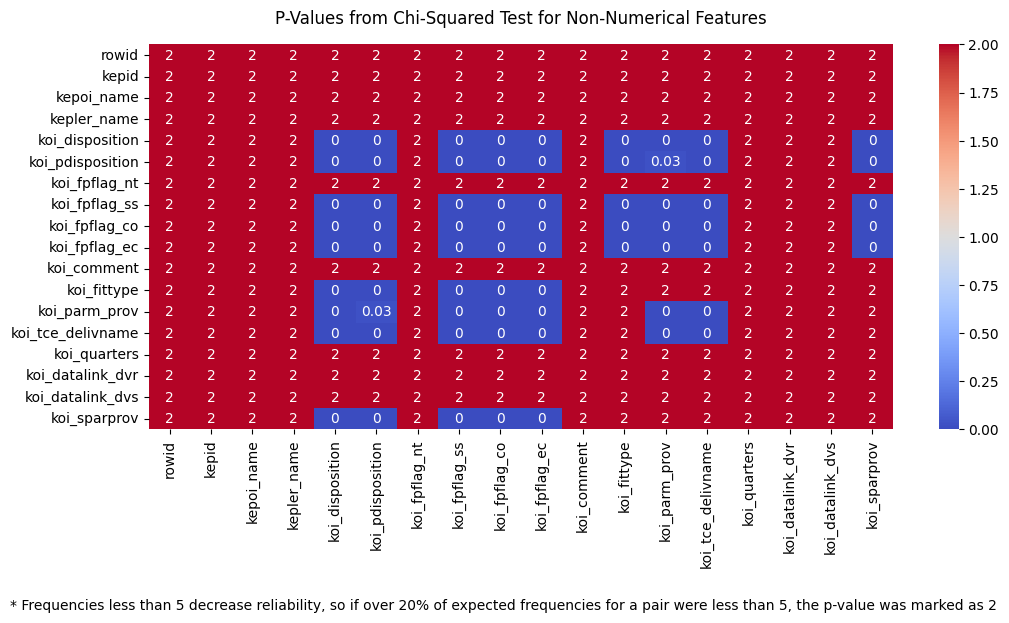

In [11]:
# Plot p-values from chi-squared test
plt.figure(figsize=(12,5))
sns.heatmap(p_matrix, annot=True, cmap='coolwarm')
plt.title('P-Values from Chi-Squared Test for Non-Numerical Features', pad=15)
plt.annotate(text=r'* Frequencies less than 5 decrease reliability, so if over 20% of expected frequencies for a pair were less than 5, the p-value was marked as 2', xy=(-100,-130), xycoords='axes points')
plt.show()

### Visualizations for Target and Features of Current Interest

The target variable will be "koi_disposition" so the analysis will have greater emphasis on understanding relationships to this variable.

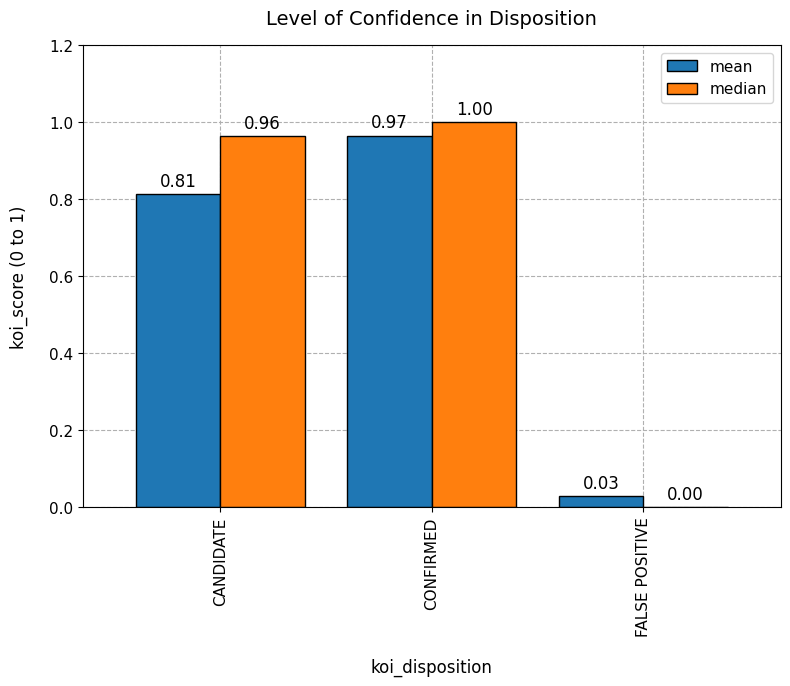

In [12]:
# Distribution of categories in "koi_disposition" (target)
data = KOI_df.groupby('koi_disposition')['koi_score'].agg(['mean', 'median'])
width = 0.8
ax = data.plot.bar(width=width, figsize=(9,6), edgecolor='black')
ax.grid(linestyle='--')
ax.set_axisbelow(True)
plt.title('Level of Confidence in Disposition', pad=15, fontsize=14)
plt.xlabel('koi_disposition', labelpad=15, fontsize=12)
plt.ylabel('koi_score (0 to 1)', labelpad=15, fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.ylim([0,1.2])

for i, disposition in enumerate(data.index):
    mean = data.loc[disposition, 'mean']
    median = data.loc[disposition, 'median']
    ax.annotate(text=f'{mean:.2f}', xy=(i-width/4, mean+0.02), ha='center', fontsize=12)
    ax.annotate(text=f'{median:.2f}', xy=(i+width/4, median+0.02), ha='center', fontsize=12)

plt.legend(fontsize=11)
plt.show()

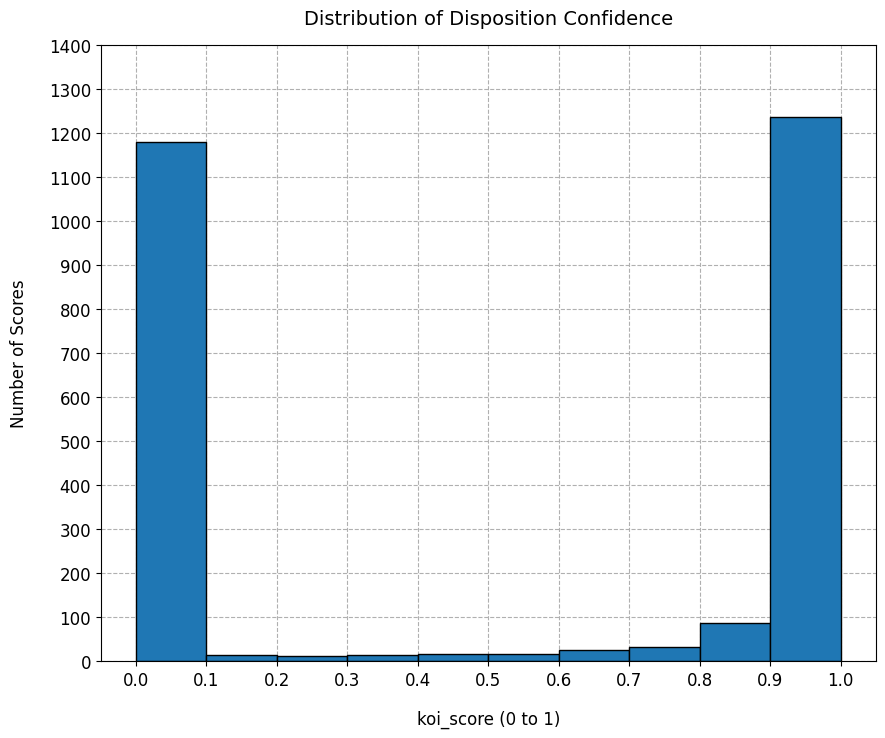

In [13]:
# Histogram of disposition score
KOI_df['koi_score'].plot.hist(figsize=(10,8), bins=10, edgecolor='black')
plt.title('Distribution of Disposition Confidence', pad=15, fontsize=14)
plt.xlabel('koi_score (0 to 1)', labelpad=15, fontsize=12)
plt.ylabel('Number of Scores', labelpad=15, fontsize=12)
xticks = [i for i in np.arange(0,1.1,0.1)]
yticks = [i for i in range(0, 1600, 100)]
plt.xticks(ticks=xticks, fontsize=12)
plt.yticks(ticks=yticks, fontsize=12)
plt.grid(linestyle='--')
plt.gca().set_axisbelow(True)
plt.ylim([0,1400])

plt.show()

Saving figures for koi_disposition
Saving figures for koi_pdisposition
Saving figures for koi_fpflag_nt


C:\Users\micha\AppData\Local\Temp\ipykernel_16680\1616841771.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax = KOI_df.groupby(feature)[feature].count().plot.bar(edgecolor='black')


Saving figures for koi_fpflag_ss


C:\Users\micha\AppData\Local\Temp\ipykernel_16680\1616841771.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax = KOI_df.groupby(feature)[feature].count().plot.bar(edgecolor='black')


Saving figures for koi_fpflag_co


C:\Users\micha\AppData\Local\Temp\ipykernel_16680\1616841771.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax = KOI_df.groupby(feature)[feature].count().plot.bar(edgecolor='black')


Saving figures for koi_fpflag_ec


C:\Users\micha\AppData\Local\Temp\ipykernel_16680\1616841771.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax = KOI_df.groupby(feature)[feature].count().plot.bar(edgecolor='black')


Saving figures for koi_fittype
Saving figures for koi_parm_prov
Saving figures for koi_tce_delivname
Saving figures for koi_sparprov
Saving figures for koi_score
Saving figures for koi_period
Saving figures for koi_period_err1
Saving figures for koi_period_err2
Saving figures for koi_time0bk
Saving figures for koi_time0bk_err1
Saving figures for koi_time0bk_err2
Saving figures for koi_time0
Saving figures for koi_time0_err1
Saving figures for koi_time0_err2
Saving figures for koi_impact
Saving figures for koi_impact_err1
Saving figures for koi_impact_err2
Saving figures for koi_duration
Saving figures for koi_duration_err1
Saving figures for koi_duration_err2
Saving figures for koi_depth
Saving figures for koi_depth_err1
Saving figures for koi_depth_err2
Saving figures for koi_ror
Saving figures for koi_ror_err1
Saving figures for koi_ror_err2
Saving figures for koi_srho
Saving figures for koi_srho_err1
Saving figures for koi_srho_err2
Saving figures for koi_prad
Saving figures for koi

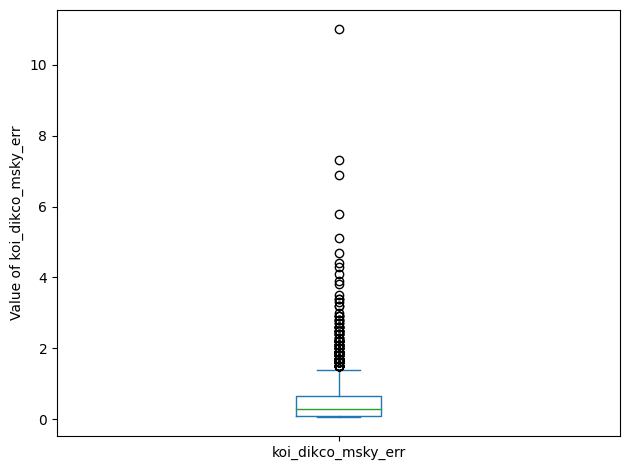

In [14]:
import os

# Save hist and box for numerical types, bar for categorical types (with 10 or fewer unique categories)
cat_fts = KOI_df.select_dtypes(exclude='number').columns
num_fts = KOI_df.select_dtypes(include='number').columns

if not os.path.exists('plots'):
    os.mkdir('plots')

if not os.path.exists('plots/distributions'):
    os.mkdir('plots/distributions')

for feature in cat_fts:

    if KOI_df[feature].nunique() > 10:
        continue

    print(f'Saving figures for {feature}')
    plt.clf()
    ax = KOI_df.groupby(feature)[feature].count().plot.bar(edgecolor='black')
    plt.xlabel(feature)
    plt.ylabel('Number of Occurrences')
    plt.tight_layout()
    plt.savefig(f'plots/distributions/{feature}-bar.png', dpi=300)

for feature in num_fts:
    print(f'Saving figures for {feature}')
    plt.clf()
    ax = KOI_df[feature].plot.hist(edgecolor='black')
    plt.xlabel(feature)
    plt.ylabel('Number of Occurrences')
    plt.tight_layout()
    plt.savefig(f'plots/distributions/{feature}-hist.png', dpi=300)
    plt.clf()
    ax = KOI_df[feature].plot.box()
    plt.ylabel(f'Value of {feature}')
    plt.tight_layout()
    plt.savefig(f'plots/distributions/{feature}-box.png', dpi=300)

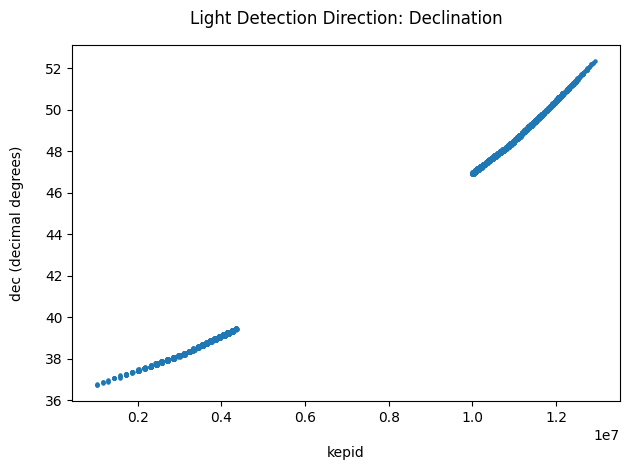

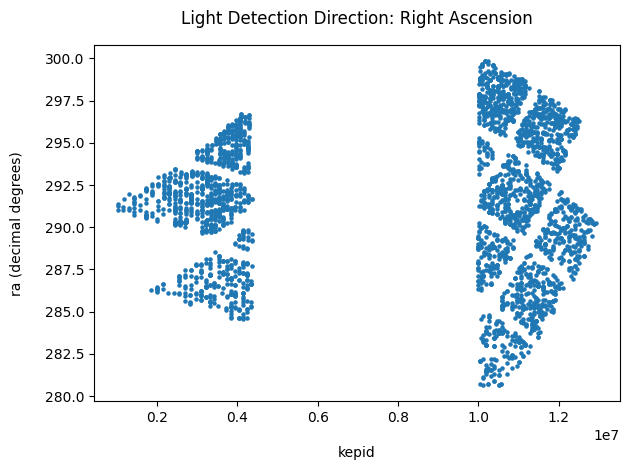

In [15]:
# Make scatter plots to see relationship between detection direction and star id
plt.scatter(KOI_df['kepid'], KOI_df['dec'], s=5)
plt.title('Light Detection Direction: Declination', pad=15)
plt.xlabel('kepid', labelpad=15)
plt.ylabel('dec (decimal degrees)', labelpad=15)
plt.tight_layout()
plt.show()

plt.scatter(KOI_df['kepid'], KOI_df['ra'], s=5)
plt.title('Light Detection Direction: Right Ascension', pad=15)
plt.xlabel('kepid', labelpad=15)
plt.ylabel('ra (decimal degrees)', labelpad=15)
plt.tight_layout()
plt.show()

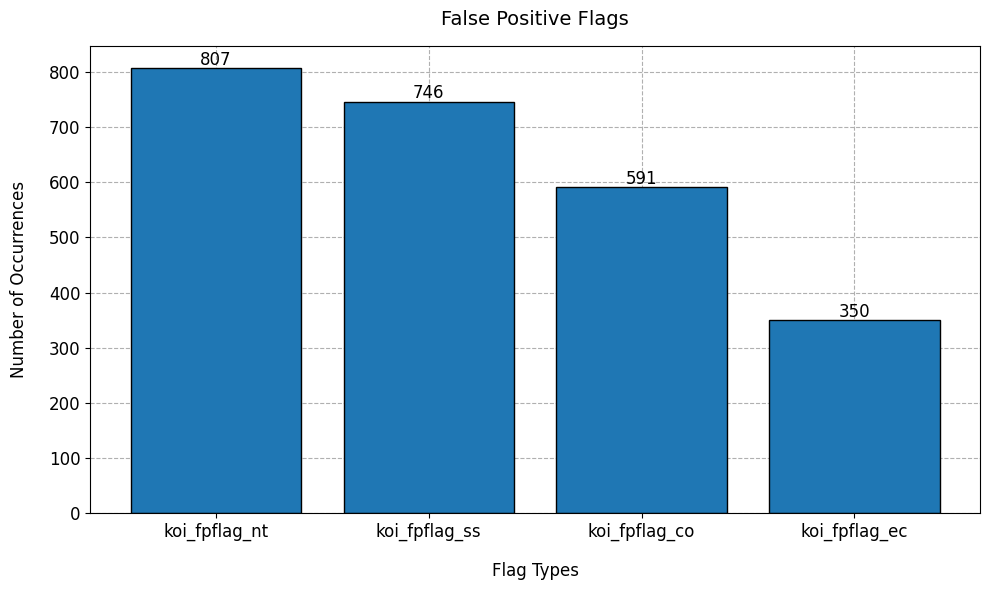

In [16]:
# Plot distribution of false positive flags
flags = ['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec']
counts = []

for flag in flags:
    count = KOI_df[flag].astype(int).sum()
    counts.append(count)

plt.figure(figsize=(10,6))
plt.bar(flags, counts, edgecolor='black')
plt.title('False Positive Flags', pad=15, fontsize=14)
plt.xlabel('Flag Types', labelpad=15, fontsize=12)
plt.ylabel('Number of Occurrences', labelpad=15, fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for i, count in enumerate(counts):
    plt.annotate(text=f'{count}', xy=(i, count+6), ha='center', fontsize=12)

plt.grid(linestyle='--')
plt.gca().set_axisbelow(True)
plt.tight_layout()
plt.show()

### Detect Outliers

In [17]:
from scipy.stats import zscore

# This function was provided in the Data Wrangling Demo by Grant & Castro (CAP5771, University of Florida, 2025)
def detect_outliers_democratic(df, min_agreement = 2):
    df = df.copy()  
    num_cols = df.select_dtypes(include=['number']).columns  
    outlier_summary = {}

    print(f'Numerical Outliers: Agreement of {min_agreement} out of 3 Methods')
    print('----------------------------------------------------------------------')

    for col in num_cols:
        values = df[col].dropna()  
        
        Q1 = np.percentile(values, 25)
        Q3 = np.percentile(values, 75)
        IQR = Q3 - Q1
        iqr_lower = Q1 - 1.5 * IQR
        iqr_upper = Q3 + 1.5 * IQR
        iqr_outliers = values[(values < iqr_lower) | (values > iqr_upper)].index

        z_scores = zscore(values)
        z_outliers = values[np.abs(z_scores) > 3].index

        median = np.median(values)
        mad = np.median(np.abs(values - median))
        mad_threshold = 3 * mad
        mad_outliers = values[np.abs(values - median) > mad_threshold].index

        all_outliers = list(iqr_outliers) + list(z_outliers) + list(mad_outliers)
        outlier_counts = pd.Series(all_outliers).value_counts()
        final_outliers = outlier_counts[outlier_counts >= min_agreement].index.tolist()

        if final_outliers:
            outlier_summary[col] = final_outliers

    if outlier_summary:
        for col, indices in outlier_summary.items():
            print(f"{col}: {len(indices)} outliers detected at {indices}")

    return outlier_summary

In [18]:
# Find numerical outliers
outliers_2agree = detect_outliers_democratic(KOI_df, 2)
print()
outliers_3agree = detect_outliers_democratic(KOI_df, 3)

Numerical Outliers: Agreement of 2 out of 3 Methods
----------------------------------------------------------------------
koi_period: 478 outliers detected at [342, 24, 7016, 7056, 7054, 7052, 7051, 7050, 7047, 7044, 7043, 7042, 7040, 7037, 7020, 7015, 7059, 7014, 6989, 6988, 6985, 6984, 6983, 6957, 6956, 6806, 6803, 6802, 6801, 7058, 7060, 6799, 7079, 7098, 7097, 7096, 7095, 7093, 7092, 7091, 7090, 7089, 7088, 7086, 7082, 7078, 7061, 7077, 7075, 7073, 7072, 7071, 7070, 7069, 7067, 7065, 7064, 7063, 7062, 6800, 6772, 7106, 6469, 6550, 6549, 6548, 6536, 6533, 6531, 6529, 6505, 6502, 6501, 6498, 6470, 6467, 6552, 6447, 6446, 6445, 6444, 6442, 6425, 6424, 6423, 6421, 6402, 6401, 6400, 6551, 6577, 6771, 6674, 6768, 6767, 6742, 6740, 6738, 6710, 6708, 6704, 6703, 6678, 6677, 6675, 6673, 6578, 6647, 6645, 6643, 6642, 6640, 6613, 6612, 6611, 6610, 6609, 6608, 6579, 7099, 7107, 6397, 7461, 7556, 7538, 7537, 7535, 7527, 7509, 7508, 7500, 7487, 7484, 7463, 7462, 7459, 7581, 7453, 7432, 7424, 74

Saving figures for koi_score (2/3 agreement)
Saving figures for koi_period (2/3 agreement)
Saving figures for koi_period_err1 (2/3 agreement)
Saving figures for koi_period_err2 (2/3 agreement)
Saving figures for koi_time0bk (2/3 agreement)
Saving figures for koi_time0bk_err1 (2/3 agreement)
Saving figures for koi_time0bk_err2 (2/3 agreement)
Saving figures for koi_time0 (2/3 agreement)
Saving figures for koi_time0_err1 (2/3 agreement)
Saving figures for koi_time0_err2 (2/3 agreement)
Saving figures for koi_impact (2/3 agreement)
Saving figures for koi_impact_err1 (2/3 agreement)
Saving figures for koi_impact_err2 (2/3 agreement)
Saving figures for koi_duration (2/3 agreement)
Saving figures for koi_duration_err1 (2/3 agreement)
Saving figures for koi_duration_err2 (2/3 agreement)
Saving figures for koi_depth (2/3 agreement)
Saving figures for koi_depth_err1 (2/3 agreement)
Saving figures for koi_depth_err2 (2/3 agreement)
Saving figures for koi_ror (2/3 agreement)
Saving figures for ko

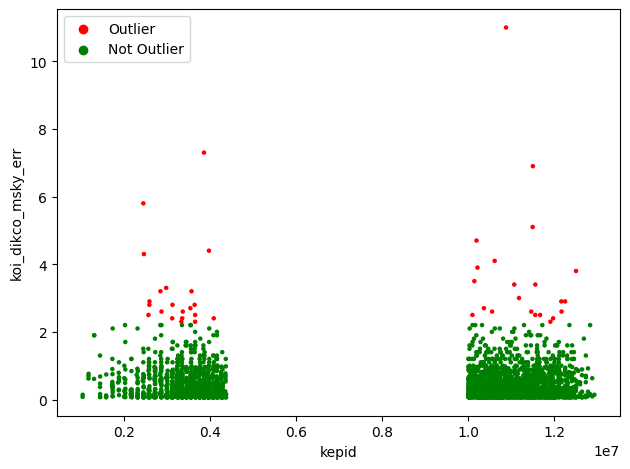

In [19]:
# Save scatter plots of kepid compared to each feature (with outliers marked, 2/3 outlier detection methods agreed)

if not os.path.exists('plots'):
    os.mkdir('plots')

if not os.path.exists('plots/outliers'):
    os.mkdir('plots/outliers')

for feature in KOI_df.select_dtypes(include='number').columns:

    print(f'Saving figures for {feature} (2/3 agreement)')

    if feature not in outliers_2agree:
        is_outlier = [False for _ in range(KOI_df.shape[0])]
    else:
        is_outlier = KOI_df.index.isin(outliers_2agree[feature])

    colors = []

    for i in range(len(is_outlier)):

        if is_outlier[i] == True:
            color = 'red'
        else:
            color= 'green'

        colors.append(color)

    plt.clf()
    plt.scatter(KOI_df['kepid'], KOI_df[feature], c=colors, s=5)
    plt.scatter([], [], c='red', label='Outlier')
    plt.scatter([], [], c='green', label='Not Outlier')
    plt.xlabel('kepid')
    plt.ylabel(f'{feature}')
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'plots/outliers/{feature}-2-out-of-3-agreement.png', dpi=300)

# Save scatter plots of kepid compared to each feature (with outliers marked, 3/3 outlier detection methods agreed)

for feature in KOI_df.select_dtypes(include='number').columns:

    if feature not in outliers_3agree:
        print(f'{feature} has 0 outliers so nothing to save (3/3 agreement)')
        continue

    print(f'Saving figures for {feature} (3/3 agreement)')

    if feature not in outliers_3agree:
        is_outlier = [False for _ in range(KOI_df.shape[0])]
    else:
        is_outlier = KOI_df.index.isin(outliers_3agree[feature])

    colors = []

    for i in range(len(is_outlier)):

        if is_outlier[i] == True:
            color = 'red'
        else:
            color= 'green'

        colors.append(color)

    plt.clf()
    plt.scatter(KOI_df['kepid'], KOI_df[feature], c=colors, s=5)
    plt.scatter([], [], c='red', label='Outlier')
    plt.scatter([], [], c='green', label='Not Outlier')
    plt.xlabel('kepid')
    plt.ylabel(f'{feature}')
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'plots/outliers/{feature}-3-out-of-3-agreement.png', dpi=300)

Visually, unanimous agreement (3/3) seems to be a better outlier detection. 2/3 agreement considers a large portion of the data to be outliers which would likely lead to insufficient amount of data to train off. Going forward, outliers will require unanimous agreement.

### Impute

The strategy will be to impute missing valus with median values for numerical values and the most frequent category for categorical variables. Outliers will not be included in the statistics used for imputing. "koi_disposition" is the target and will not be imputed. "koi_pdisposition" is closely related to the target so the same will follow. For categorical variables, if more than 50% of the non-null values are the same then it would be imputed. This prevents imputing for columns like "kepler_name" (planet name) which would not make sense to guess by frequency alone.

In [35]:
# Select numerical and categorical columns
num_cols = KOI_df.select_dtypes(include='number').columns
cat_cols = KOI_df.select_dtypes(exclude='number').drop(columns=['koi_disposition', 'koi_pdisposition']).columns

print('Numerical Imputations')
print('------------------------')

# Impute numerical columns with median

for col in num_cols:

    if col not in outliers_3agree:
        not_outlier = [True for _ in range(KOI_df.shape[0])]
    else:
        not_outlier = ~KOI_df.index.isin(outliers_3agree[feature])

    median = KOI_df[not_outlier][col].median()
    num_nulls = KOI_df[col].isna().sum()

    if num_nulls > 0:
        KOI_df[col] = KOI_df[col].fillna(median)
        print(f'Imputed {num_nulls} nulls of {col} with {median}')

print()
print('Categorical Imputations')
print('------------------------')

# Impute categorical columns with median
for col in cat_cols:

    most_frequent = KOI_df[col].value_counts().index[0]
    num_occurrences = KOI_df[col].value_counts().iloc[0]
    total_values = KOI_df[~KOI_df[col].isna()].shape[0]
    num_nulls = KOI_df[col].isna().sum()
    threshold = 0.5

    if num_nulls > 0 and num_occurrences/total_values > threshold:
        KOI_df[col] = KOI_df[col].fillna(most_frequent)
        print(f'Imputed {num_nulls} nulls of {col} with {most_frequent}')

Numerical Imputations
------------------------
Imputed 528 nulls of koi_score with 0.8035000000000001
Imputed 154 nulls of koi_period_err1 with 3.048e-05
Imputed 154 nulls of koi_period_err2 with -3.048e-05
Imputed 154 nulls of koi_time0bk_err1 with 0.00344
Imputed 154 nulls of koi_time0bk_err2 with -0.00344
Imputed 154 nulls of koi_time0_err1 with 0.00344
Imputed 154 nulls of koi_time0_err2 with -0.00344
Imputed 132 nulls of koi_impact with 0.54
Imputed 154 nulls of koi_impact_err1 with 0.1983
Imputed 154 nulls of koi_impact_err2 with -0.19
Imputed 154 nulls of koi_duration_err1 with 0.126
Imputed 154 nulls of koi_duration_err2 with -0.126
Imputed 132 nulls of koi_depth with 440.3
Imputed 154 nulls of koi_depth_err1 with 20.9
Imputed 154 nulls of koi_depth_err2 with -20.9
Imputed 132 nulls of koi_ror with 0.021934
Imputed 132 nulls of koi_ror_err1 with 0.001101
Imputed 132 nulls of koi_ror_err2 with -0.001308
Imputed 117 nulls of koi_srho with 1.033555
Imputed 117 nulls of koi_srho_er

### Quality Check

At this point, there is a better feel for which variables are important. Here, these will be dealt with by dropping irrelvant features and rows. There is reservation to drop rows because that would be an entire star's data that is erased and a lot of corresponding light curve data would go to waste. When appropriate, a bad feature is preferred to be dropped rather than rows that it has nulls for.

In [36]:
# Show columns that still have null values
print('Columns with nulls remaining')
print('---------------------------------')

i = 1
for col in KOI_df.columns:
    num_nulls = KOI_df[col].isna().sum()
    if num_nulls > 0:
        print(f'{i}. {col} still has {num_nulls} nulls')
        print(f'Number of unique entries: {KOI_df[col].nunique()}')
        print('Sample of Up to 5 Values:')
        display(KOI_df[col].head())
        print()
        i += 1

Columns with nulls remaining
---------------------------------
1. kepler_name still has 2130 nulls
Number of unique entries: 1034
Sample of Up to 5 Values:


0    Kepler-227 b
1    Kepler-227 c
2             NaN
3             NaN
4    Kepler-664 b
Name: kepler_name, dtype: object


2. koi_comment still has 445 nulls
Number of unique entries: 480
Sample of Up to 5 Values:


0                                          NO_COMMENT
1                                          NO_COMMENT
2                                       DEEP_V_SHAPED
3    MOD_ODDEVEN_DV---MOD_ODDEVEN_ALT---DEEP_V_SHAPED
4                                          NO_COMMENT
Name: koi_comment, dtype: object


3. koi_datalink_dvr still has 133 nulls
Number of unique entries: 2629
Sample of Up to 5 Values:


0    010/010797/010797460/dv/kplr010797460-20160209...
1    010/010797/010797460/dv/kplr010797460-20160209...
2    010/010811/010811496/dv/kplr010811496-20160209...
3    010/010848/010848459/dv/kplr010848459-20160209...
4    010/010854/010854555/dv/kplr010854555-20160209...
Name: koi_datalink_dvr, dtype: object


4. koi_datalink_dvs still has 133 nulls
Number of unique entries: 3031
Sample of Up to 5 Values:


0    010/010797/010797460/dv/kplr010797460-001-2016...
1    010/010797/010797460/dv/kplr010797460-002-2016...
2    010/010811/010811496/dv/kplr010811496-001-2016...
3    010/010848/010848459/dv/kplr010848459-001-2016...
4    010/010854/010854555/dv/kplr010854555-001-2016...
Name: koi_datalink_dvs, dtype: object

All the remaining columns with null values are non-numerical and suffer from relatively high cardinality. It would be difficult to make meaningful categories. Based off previous observations, there are many other features with potential for better predictive power so these can safely be dropped.

In [37]:
# Drop remaining columns with nulls
for col in KOI_df.columns:
    num_nulls = KOI_df[col].isna().sum()
    if num_nulls > 0:
        KOI_df = KOI_df.drop(columns=col)
        print(f'Dropped {col}')

Dropped kepler_name
Dropped koi_comment
Dropped koi_datalink_dvr
Dropped koi_datalink_dvs


In [38]:
# Show non-numerical columns
print('Non-Numerical Columns')
print('---------------------------------')

i = 1
for col in KOI_df.select_dtypes(exclude='number').columns:
    print(f'Number of unique entries: {KOI_df[col].nunique()}')
    print('Sample of Up to 5 Values:')
    display(KOI_df[col].head())
    print()
    i += 1

Non-Numerical Columns
---------------------------------
Number of unique entries: 2680
Sample of Up to 5 Values:


0    10797460
1    10797460
2    10811496
3    10848459
4    10854555
Name: rowid, dtype: category
Categories (2680, int64): [1026032, 1026957, 1027438, 1161345, ..., 12834874, 12835139, 12885212, 12935144]


Number of unique entries: 2680
Sample of Up to 5 Values:


0    10797460
1    10797460
2    10811496
3    10848459
4    10854555
Name: kepid, dtype: category
Categories (2680, int64): [1026032, 1026957, 1027438, 1161345, ..., 12834874, 12835139, 12885212, 12935144]


Number of unique entries: 3164
Sample of Up to 5 Values:


0    K00752.01
1    K00752.02
2    K00753.01
3    K00754.01
4    K00755.01
Name: kepoi_name, dtype: object


Number of unique entries: 3
Sample of Up to 5 Values:


0         CONFIRMED
1         CONFIRMED
2         CANDIDATE
3    FALSE POSITIVE
4         CONFIRMED
Name: koi_disposition, dtype: object


Number of unique entries: 2
Sample of Up to 5 Values:


0         CANDIDATE
1         CANDIDATE
2         CANDIDATE
3    FALSE POSITIVE
4         CANDIDATE
Name: koi_pdisposition, dtype: object


Number of unique entries: 3
Sample of Up to 5 Values:


0    0
1    0
2    0
3    0
4    0
Name: koi_fpflag_nt, dtype: category
Categories (3, int64): [0, 1, 465]


Number of unique entries: 2
Sample of Up to 5 Values:


0    0
1    0
2    0
3    1
4    0
Name: koi_fpflag_ss, dtype: category
Categories (2, int64): [0, 1]


Number of unique entries: 2
Sample of Up to 5 Values:


0    0
1    0
2    0
3    0
4    0
Name: koi_fpflag_co, dtype: category
Categories (2, int64): [0, 1]


Number of unique entries: 2
Sample of Up to 5 Values:


0    0
1    0
2    0
3    0
4    0
Name: koi_fpflag_ec, dtype: category
Categories (2, int64): [0, 1]


Number of unique entries: 4
Sample of Up to 5 Values:


0    LS+MCMC
1    LS+MCMC
2    LS+MCMC
3    LS+MCMC
4    LS+MCMC
Name: koi_fittype, dtype: object


Number of unique entries: 3
Sample of Up to 5 Values:


0    q1_q17_dr25_koi
1    q1_q17_dr25_koi
2    q1_q17_dr25_koi
3    q1_q17_dr25_koi
4    q1_q17_dr25_koi
Name: koi_parm_prov, dtype: object


Number of unique entries: 3
Sample of Up to 5 Values:


0    q1_q17_dr25_tce
1    q1_q17_dr25_tce
2    q1_q17_dr25_tce
3    q1_q17_dr25_tce
4    q1_q17_dr25_tce
Name: koi_tce_delivname, dtype: object


Number of unique entries: 96
Sample of Up to 5 Values:


0    11111111111111111000000000000000
1    11111111111111111000000000000000
2    11111101110111011000000000000000
3    11111110111011101000000000000000
4    01111111111111111000000000000000
Name: koi_quarters, dtype: object


Number of unique entries: 4
Sample of Up to 5 Values:


0    q1_q17_dr25_stellar
1    q1_q17_dr25_stellar
2    q1_q17_dr25_stellar
3    q1_q17_dr25_stellar
4    q1_q17_dr25_stellar
Name: koi_sparprov, dtype: object

"koi_quarters" and "kepoi_name" have high cardinality and better represent their information as strings. However, the other non-numerical columns can be converted to a categorical type since they are low cardinality and actual categories. "rowid" may also be dropped at this point since it is just a counter and the data frame's index or "kepoi_name" serve as better identifiers. Some floats are also better suited as integers.

In [39]:
# Convert categorical variables to the categorical data type
for col in KOI_df.select_dtypes(exclude='number').drop(columns=['koi_quarters', 'kepoi_name']):
    KOI_df[col] = KOI_df[col].astype('category')
    print(f'Converted {col} to category data type')

# Drop rowid (counter)
KOI_df = KOI_df.drop(columns='rowid')
print('Dropped rowid')

Converted rowid to category data type
Converted kepid to category data type
Converted koi_disposition to category data type
Converted koi_pdisposition to category data type
Converted koi_fpflag_nt to category data type
Converted koi_fpflag_ss to category data type
Converted koi_fpflag_co to category data type
Converted koi_fpflag_ec to category data type
Converted koi_fittype to category data type
Converted koi_parm_prov to category data type
Converted koi_tce_delivname to category data type
Converted koi_sparprov to category data type
Dropped rowid


In [40]:
# Convert int to float
KOI_df['koi_tce_plnt_num'] = KOI_df['koi_tce_plnt_num'].astype(int)
print('Converted koi_tce_plnt_num to int')

Converted koi_tce_plnt_num to int


### Normalize

To prepare for PCA, standard scaler will be used on features (not target).

In [41]:
# Current data frame
print('KOI Data Before Scaling')
display(KOI_df)

KOI Data Before Scaling


,kepid,kepoi_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_time0,koi_time0_err1,koi_time0_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_ror,koi_ror_err1,koi_ror_err2,koi_srho,koi_srho_err1,koi_srho_err2,koi_fittype,koi_prad,koi_prad_err1,koi_prad_err2,koi_sma,koi_incl,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_dor,koi_dor_err1,koi_dor_err2,koi_ldm_coeff2,koi_ldm_coeff1,koi_parm_prov,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_count,koi_num_transits,koi_tce_plnt_num,koi_tce_delivname,koi_quarters,koi_bin_oedp_sig,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_smet,koi_smet_err1,koi_smet_err2,koi_srad,koi_srad_err1,koi_srad_err2,koi_smass,koi_smass_err1,koi_smass_err2,koi_sparprov,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag,koi_fwm_stat_sig,koi_fwm_sra,koi_fwm_sra_err,koi_fwm_sdec,koi_fwm_sdec_err,koi_fwm_srao,koi_fwm_srao_err,koi_fwm_sdeco,koi_fwm_sdeco_err,koi_fwm_prao,koi_fwm_prao_err,koi_fwm_pdeco,koi_fwm_pdeco_err,koi_dicco_mra,koi_dicco_mra_err,koi_dicco_mdec,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err
0,10797460,K00752.01,CONFIRMED,CANDIDATE,1.0000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,2455003.539,0.002160,-0.002160,0.146,0.3180,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,0.022344,0.000832,-0.000528,3.20796,0.33173,-1.09986,LS+MCMC,2.26,0.26,-0.15,0.0853,89.66,793.0,93.59,29.45,-16.65,24.810000,2.600,-2.600,0.2291,0.4603,q1_q17_dr25_koi,5.135849,28.470820,35.8,2,142.0,1,q1_q17_dr25_tce,11111111111111111000000000000000,0.6864,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.14,0.15,-0.15,0.927,0.105,-0.061,0.919,0.052,-0.046,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.002,19.462294,1.400000e-05,48.141910,0.000130,0.430,0.5100,0.940,0.480,-0.000200,0.000320,-0.000550,0.000310,-0.010,0.130,0.200,0.160,0.200,0.170,0.080,0.130,0.310,0.170,0.320,0.160
1,10797460,K00752.02,CONFIRMED,CANDIDATE,0.9690,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,2454995.514,0.003520,-0.003520,0.586,0.0590,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,0.027954,0.009078,-0.001347,3.02368,2.20489,-2.49638,LS+MCMC,2.83,0.32,-0.19,0.2734,89.57,443.0,9.11,2.87,-1.62,77.900000,28.400,-28.400,0.2291,0.4603,q1_q17_dr25_koi,7.027669,20.109507,25.8,2,25.0,2,q1_q17_dr25_tce,11111111111111111000000000000000,0.0023,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.14,0.15,-0.15,0.927,0.105,-0.061,0.919,0.052,-0.046,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.003,19.462265,2.000000e-05,48.141990,0.000190,-0.630,0.7200,1.230,0.680,0.000660,0.000650,-0.001050,0.000630,0.390,0.360,0.000,0.480,0.390,0.360,0.490,0.340,0.120,0.730,0.500,0.450
2,10811496,K00753.01,CANDIDATE,CANDIDATE,0.0000,0,0,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,2455008.850,0.000581,-0.000581,0.969,5.1260,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,0.154046,5.034292,-0.042179,7.29555,35.03293,-2.75453,LS+MCMC,14.60,3.92,-1.31,0.1419,88.96,638.0,39.30,31.04,-10.49,53.500000,25.700,-25.700,0.2711,0.3858,q1_q17_dr25_koi,37.159767,187.449100,76.3,1,56.0,1,q1_q17_dr25_tce,11111101110111011000000000000000,0.6624,5853.0,158.0,-176.0,4.544,0.044,-0.176,-0.18,0.30,-0.30,0.868,0.233,-0.078,0.961,0.110,-0.121,q1_q17_dr25_stellar,297.00482,48.134129,15.436,15.943,15.390,15.220,15.166,14.254,13.900,13.826,0.278,19.800321,1.900000e-06,48.134120,0.000020,-0.021,0.0690,-0.038,0.071,0.000700,0.002400,0.000600,0.003400,-0.025,0.070,-0.034,0.070,0.042,0.072,0.002,0.071,-0.027,0.074,

In [42]:
from sklearn.preprocessing import StandardScaler

# Apply standard scaler to numerical features
scaler = StandardScaler()
KOI_scaled = KOI_df.copy()
num_features = KOI_scaled.select_dtypes(include='number').columns
scaler.fit(KOI_scaled[num_features])
KOI_scaled[num_features] = scaler.transform(KOI_scaled[num_features])

print('KOI Data After Scaling')
display(KOI_scaled)

KOI Data After Scaling


,kepid,kepoi_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_time0,koi_time0_err1,koi_time0_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_ror,koi_ror_err1,koi_ror_err2,koi_srho,koi_srho_err1,koi_srho_err2,koi_fittype,koi_prad,koi_prad_err1,koi_prad_err2,koi_sma,koi_incl,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_dor,koi_dor_err1,koi_dor_err2,koi_ldm_coeff2,koi_ldm_coeff1,koi_parm_prov,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_count,koi_num_transits,koi_tce_plnt_num,koi_tce_delivname,koi_quarters,koi_bin_oedp_sig,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_smet,koi_smet_err1,koi_smet_err2,koi_srad,koi_srad_err1,koi_srad_err2,koi_smass,koi_smass_err1,koi_smass_err2,koi_sparprov,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag,koi_fwm_stat_sig,koi_fwm_sra,koi_fwm_sra_err,koi_fwm_sdec,koi_fwm_sdec_err,koi_fwm_srao,koi_fwm_srao_err,koi_fwm_sdeco,koi_fwm_sdeco_err,koi_fwm_prao,koi_fwm_prao_err,koi_fwm_pdeco,koi_fwm_pdeco_err,koi_dicco_mra,koi_dicco_mra_err,koi_dicco_mdec,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err
0,10797460,K00752.01,CONFIRMED,CANDIDATE,0.960295,0,0,0,0,-0.037265,-0.219449,0.219449,0.135794,-0.350802,0.350802,0.135799,-0.350802,0.350802,-0.232791,-0.172603,0.210352,-0.377908,-0.355332,0.355332,-0.277196,-0.159556,0.159556,-0.084243,-0.189319,0.096198,-0.107233,-0.217430,0.126657,LS+MCMC,-0.030511,-0.035078,0.027048,-0.145236,0.453269,-0.347660,-0.072414,-0.076811,0.087038,-0.042609,-0.047021,0.047021,-0.378526,0.482518,q1_q17_dr25_koi,-0.189869,-0.206920,-0.277443,0.610368,-0.403736,-0.364249,q1_q17_dr25_tce,11111111111111111000000000000000,0.574230,-0.319309,-1.338111,1.073368,0.356858,-0.405384,0.539490,0.909960,-0.983292,1.169186,-0.146965,-0.327063,0.278811,-0.300365,-0.769038,0.489166,q1_q17_dr25_stellar,0.102528,0.612603,0.796978,0.728628,0.775172,0.823803,0.856942,0.869717,0.925607,0.898580,-0.565399,0.104478,-0.208448,0.591397,-0.320012,0.037314,-0.238237,0.060762,-0.302293,0.010890,-0.030663,-0.012172,-0.031310,-0.023970,-0.593160,0.081505,-0.518709,-0.546820,-0.546358,0.037674,-0.554612,0.134865,-0.482506,-0.482461,-0.527215
1,10797460,K00752.02,CONFIRMED,CANDIDATE,0.891515,0,0,0,0,-0.017840,-0.185261,0.185261,0.001872,-0.262818,0.262818,0.001875,-0.262818,0.262818,-0.032716,-0.201578,-0.237517,-0.130624,-0.293888,0.293888,-0.273872,-0.110108,0.110108,-0.081637,-0.188399,0.094932,-0.110650,-0.192560,0.087259,LS+MCMC,-0.030220,-0.034887,0.026979,0.076585,0.447215,-0.794838,-0.073817,-0.077585,0.087647,-0.005260,0.004676,-0.004676,-0.378526,0.482518,q1_q17_dr25_koi,-0.187518,-0.208912,-0.290669,0.610368,-0.658125,1.218833,q1_q17_dr25_tce,11111111111111111000000000000000,-0.956355,-0.319309,-1.338111,1.073368,0.356858,-0.405384,0.539490,0.909960,-0.983292,1.169186,-0.146965,-0.327063,0.278811,-0.300365,-0.769038,0.489166,q1_q17_dr25_stellar,0.102528,0.612603,0.796978,0.728628,0.775172,0.823803,0.856942,0.869717,0.925607,0.898580,-0.561368,0.104372,0.149676,0.591413,0.010362,-0.028945,0.099449,0.079005,0.005014,0.021164,-0.030598,-0.017132,-0.031268,0.154883,-0.096412,0.002227,0.078600,-0.480687,-0.201832,0.222631,-0.123007,0.058172,0.556684,-0.419529,-0.019234
2,10811496,K00753.01,CANDIDATE,CANDIDATE,-1.258393,0,0,0,0,-0.032764,-0.221438,0.221438,0.224434,-0.452954,0.452954,0.224430,-0.452954,0.452954,0.141439,0.365267,0.314403,-0.565474,-0.441463,0.441463,-0.146120,0.308655,-0.308655,-0.023074,0.372333,0.031806,-0.031433,0.243308,0.079976,LS+MCMC,-0.024193,-0.023440,0.025051,-0.078490,0.406179,-0.545696,-0.073316,-0.076765,0.087287,-0.022426,-0.000734,0.000734,0.278689,-0.

### Save Cleaned KOI Data

In [43]:
KOI_scaled.to_csv('KOI_cumulative_cleaned.csv', index=False)

## Light Curves

### Basic Information

In [ ]:
# Connect to database
conn = sqlite3.connect('light_curves.db')
cursor = conn.cursor()
cursor.execute('PRAGMA cache_size = 1000000')

# Display first 5 rows
query = """
    SELECT *
    FROM LightCurve
    LIMIT 5;
    """

df = pd.read_sql(query, conn)
print('First 5 Rows')
print(df)

# Display number of nulls per column
columns = ['KEP_ID', 'TIME', 'TIMECORR', 'PDCSAP_FLUX', 'PDCSAP_FLUX_ERR', 'SAP_QUALITY']

for col in columns:

    query = f"""
        SELECT COUNT(*) AS num_nulls
        FROM LightCurve
        WHERE {col} IS NULL;
        """

    df = pd.read_sql(query, conn)
    print()
    print(f'{col} Nulls')
    print(df)

query = f"""
        SELECT COUNT(*) AS num_nulls
        FROM LightCurve
        WHERE KEP_ID IS NULL OR TIME IS NULL OR TIMECORR IS NULL OR PDCSAP_FLUX IS NULL OR PDCSAP_FLUX_ERR IS NULL OR SAP_QUALITY IS NULL;
        """

df = pd.read_sql(query, conn)
print()
print(f'Number of Complete Null Rows')
print(df)

First 5 Rows
     KEP_ID        TIME  TIMECORR  PDCSAP_FLUX  PDCSAP_FLUX_ERR  SAP_QUALITY
0  10000162  131.512455  0.001461    13616.448         4.294821            0
1  10000162  131.532889  0.001462    13615.929         4.294411            0
2  10000162  131.553324  0.001463    13610.085         4.292512            0
3  10000162  131.573758  0.001463    13611.477         4.292730            0
4  10000162  131.594192  0.001464    13608.755         4.294600            0
KEP_ID Nulls
   num_nulls
0          0
TIME Nulls
   num_nulls
0    9755875
TIMECORR Nulls
   num_nulls
0          0
PDCSAP_FLUX Nulls
   num_nulls
0   17205980
PDCSAP_FLUX_ERR Nulls
   num_nulls
0   17205980
SAP_QUALITY Nulls
   num_nulls
0          0
Number of Complete Null Rows
   num_nulls
0   17205980


Due to the current size and structure of the light curve data, as well as computational constraints, queries are extremely slow. At this point, it is difficult to acquire summary statistics via SQL queries. However, insights from the KOI dataset are closely related to the light curve data. Star compositions, locations, etc. were already processed via the KOI dataset. Combined with the sample and null counts, there is sufficient understanding of the light curve data for the exploratory phase. More in depth analysis can be done during feature selection since the dimensionality should be reduced in that phase. Removing nulls is not necessary at this time since they provide valuable information. For example, periodic missing times could mean the detectors regularly turn off and this could be important to know, both for personal knowledge and possibly for the model to learn. SAP_QUALITY has no nulls and usually describes why the rest are missing via codes. Also, a model of interest is RNN which can have a masking layer that skips nulls. NASA provides their own documentation which combined with domain knowledge gives the general idea of the summary statistics. Finally, due to these computational constraints, the KOI and light curve data will be "virtually" merged. They will exist in their own locations, but KOI has a star id feature which will be able to identify rows in the light curve data to select. A physical merge will happen right before model training since the data would be significantly reduced by then.